In [2]:
# https://www.kaggle.com/sheokhand/data-analysis-project/notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import os

In [3]:
print(os.listdir())

['.ipynb_checkpoints', 'Donation-Analysis.ipynb', 'Donations.csv', 'Donors.csv', 'ERD.jpg', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'Teachers.csv']


## Reading data from files 

In [74]:
resources = pd.read_csv("Resources.csv", error_bad_lines = False, warn_bad_lines = False, low_memory = False)

In [5]:
schools = pd.read_csv("Schools.csv", error_bad_lines = False, warn_bad_lines = False, low_memory = False)

In [6]:
donors = pd.read_csv("Donors.csv", error_bad_lines = False, warn_bad_lines = False, low_memory = False)

In [7]:
donations = pd.read_csv("Donations.csv", error_bad_lines = False, warn_bad_lines = False, low_memory = False)

In [8]:
teachers = pd.read_csv("Teachers.csv", error_bad_lines = False, warn_bad_lines = False, low_memory = False)

In [9]:
projects = pd.read_csv("Projects.csv", error_bad_lines = False, warn_bad_lines = False, quoting=3)

#### Shape of DataFrames

In [10]:
print("Shape of Resources : ", resources.shape)
print("Shape of Schools : ", schools.shape)
print("Shape of Donors : ", donors.shape)
print("Shape of Donations : ", donations.shape)
print("Shape of Teachers : ", teachers.shape)
print("Shape of Projects : ", projects.shape)

Shape of Resources :  (7210448, 5)
Shape of Schools :  (72993, 9)
Shape of Donors :  (2122640, 5)
Shape of Donations :  (4687884, 7)
Shape of Teachers :  (402900, 3)
Shape of Projects :  (28227, 18)


#### Top 5 Rows of each Table

In [11]:
resources.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [12]:
schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [13]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [14]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [15]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [16]:
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,"""Did you know that 1-7 students in grades K-12...",research-validated curriculum via Internet an...,kindness,and working cooperatively will reduce any ins...,"""""Bullying in Schools"""" as they will all have...",share with their parents,and I can lead class discussions.,NaN,NaN,NaN,NaN,NaN
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"""Help us have a fun",interactive listening center in our class! Di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,<!--DONOTREMOVEESSAYDIVIDER-->I teach 22 awes...,but a large portion of them struggle to read ...,but need concrete examples and hands-on activ...,read along books on CD,and headphones for our computers. Many stude...,see,and interact with the reading material to gai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,<!--DONOTREMOVEESSAYDIVIDER-->This project is...,"""Help us have a fun",interactive listening center in our class! Di...,"""My students need a listening center",read along books on CD,"and headphones for the computers.""","""Applied Learning","Literacy & Language""","""Early Development","Literacy""",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN,NaN
4,563958074d7b12b48b939279eb59e6ca,b79a19772090efccde93b3a5934d829f,5ef1793ff657860ca7856d475715ec2a,4,Teacher-Led,It's about Time... Time for Kids!,"""We know that success in school is directly re...",more of their education is tied to textbooks ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Column DataTypes

In [17]:
resources.dtypes

Project ID               object
Resource Item Name       object
Resource Quantity       float64
Resource Unit Price     float64
Resource Vendor Name     object
dtype: object

In [18]:
donors.dtypes

Donor ID            object
Donor City          object
Donor State         object
Donor Is Teacher    object
Donor Zip           object
dtype: object

In [19]:
donations.dtypes

Project ID                              object
Donation ID                             object
Donor ID                                object
Donation Included Optional Donation     object
Donation Amount                        float64
Donor Cart Sequence                      int64
Donation Received Date                  object
dtype: object

In [20]:
schools.dtypes

School ID                        object
School Name                      object
School Metro Type                object
School Percentage Free Lunch    float64
School State                     object
School Zip                        int64
School City                      object
School County                    object
School District                  object
dtype: object

In [21]:
teachers.dtypes

Teacher ID                           object
Teacher Prefix                       object
Teacher First Project Posted Date    object
dtype: object

In [22]:
projects.dtypes

Project ID                          object
School ID                           object
Teacher ID                          object
Teacher Project Posted Sequence     object
Project Type                        object
Project Title                       object
Project Essay                       object
Project Short Description           object
Project Need Statement              object
Project Subject Category Tree       object
Project Subject Subcategory Tree    object
Project Grade Level Category        object
Project Resource Category           object
Project Cost                        object
Project Posted Date                 object
Project Expiration Date             object
Project Current Status              object
Project Fully Funded Date           object
dtype: object

#### [Optional] Change DataType (if required)

In [23]:
donations["Donation Included Optional Donation"] = donations["Donation Included Optional Donation"].astype(bool)

#### Merging of All DataFrames for Analysis

In [24]:
data1 = pd.merge(projects, donations, how = "inner", on = "Project ID")

In [25]:
data1.shape

(58177, 24)

In [26]:
data2 = pd.merge(data1, donors, how = "inner", on = "Donor ID")

In [27]:
data2.shape

(58177, 28)

In [28]:
data3 = pd.merge(data2, schools, how = "inner", on = "School ID")

In [29]:
data3.shape

(58177, 36)

In [30]:
data4 = pd.merge(data3, teachers, how = "inner", on = "Teacher ID")

In [31]:
data4.shape

(58177, 38)

In [32]:
data5 = pd.merge(data4, resources, how = "inner", on = "Project ID")

In [33]:
data5.shape

(318116, 42)

In [34]:
data5.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,...,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,"""Did you know that 1-7 students in grades K-12...",research-validated curriculum via Internet an...,kindness,and working cooperatively will reduce any ins...,...,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11,bullying in schools,25.0,1.00,AKJ Education
1,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,"""Did you know that 1-7 students in grades K-12...",research-validated curriculum via Internet an...,kindness,and working cooperatively will reduce any ins...,...,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11,stand up for yourself and your friends: dealin...,1.0,8.96,AKJ Education
2,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,"""Did you know that 1-7 students in grades K-12...",research-validated curriculum via Internet an...,kindness,and working cooperatively will reduce any ins...,...,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11,a smart kid''s guide to online bullying david ...,1.0,6.02,AKJ Education
3,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,"""Did you know that 1-7 students in grades K-12...",research-validated curriculum via Internet an...,kindness,and working cooperatively will reduce any ins...,...,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11,samsung galaxy tab 2 (7.0) wifi - tablet - and...,1.0,199.99,Best Buy Education
4,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,"""Did you know that 1-7 students in grades K-12...",research-validated curriculum via Internet an...,kindness,and working cooperatively will reduce any ins...,...,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11,bullying in schools,25.0,1.00,AKJ Education


In [35]:
col = data5.columns.values.tolist()
col

['Project ID',
 'School ID',
 'Teacher ID',
 'Teacher Project Posted Sequence',
 'Project Type',
 'Project Title',
 'Project Essay',
 'Project Short Description',
 'Project Need Statement',
 'Project Subject Category Tree',
 'Project Subject Subcategory Tree',
 'Project Grade Level Category',
 'Project Resource Category',
 'Project Cost',
 'Project Posted Date',
 'Project Expiration Date',
 'Project Current Status',
 'Project Fully Funded Date',
 'Donation ID',
 'Donor ID',
 'Donation Included Optional Donation',
 'Donation Amount',
 'Donor Cart Sequence',
 'Donation Received Date',
 'Donor City',
 'Donor State',
 'Donor Is Teacher',
 'Donor Zip',
 'School Name',
 'School Metro Type',
 'School Percentage Free Lunch',
 'School State',
 'School Zip',
 'School City',
 'School County',
 'School District',
 'Teacher Prefix',
 'Teacher First Project Posted Date',
 'Resource Item Name',
 'Resource Quantity',
 'Resource Unit Price',
 'Resource Vendor Name']

### Analysis

####  1. Top 10 states with most number of schools that opened projects to gather donations

In [46]:
n = schools["School State"].value_counts().sort_values(ascending = False).head(10)
n

California        8457
Texas             6485
New York          3819
Florida           3302
Illinois          3126
Michigan          2653
Ohio              2546
North Carolina    2543
Pennsylvania      2163
Georgia           2125
Name: School State, dtype: int64

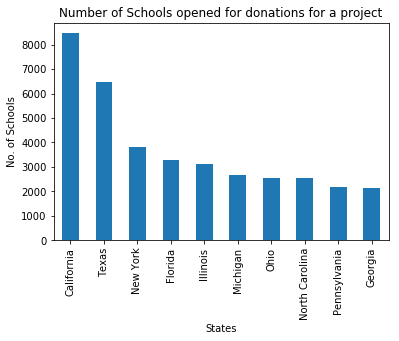

In [47]:
n.plot.bar()
plt.xlabel("States")
plt.ylabel("No. of Schools")
plt.title("Number of Schools opened for donations for a project")

#### 2. Top 10 states in which schools gatheres most amount of AVERAGE donations for theri projects </li>

In [53]:
n2 = data5.groupby("School State")["Donation Amount"].mean().sort_values(ascending = False).head(10)
n2

School State
Hawaii          179.053497
Wyoming         115.830896
Washington       88.327614
Rhode Island     84.484270
Iowa             74.265951
Montana          73.084955
Alaska           69.521586
Louisiana        66.360470
New Jersey       63.551680
Illinois         63.161516
Name: Donation Amount, dtype: float64

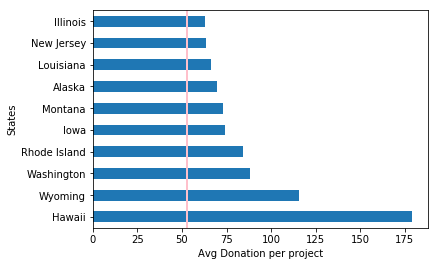

In [73]:
n2.plot.barh()
plt.xlabel("Avg Donation per project")
plt.ylabel("States")
plt.axvline(data5.groupby("School State")["Donation Amount"].mean().mean(), color = "pink", linewidth = 2)

#### 3. Maximum, Minimum, Mean, Median, 25th and 75th percentiles of Donation Amount

In [78]:
mean_donation = np.mean(data5["Donation Amount"].dropna())
mean_donation

47.47527489972308

In [81]:
median_donation = np.median(data5["Donation Amount"].dropna())
median_donation

25.0

In [101]:
percentiles_donation = np.percentile(data5["Donation Amount"].dropna(), [25,75])
percentiles_donation

array([ 10.,  50.])

In [87]:
minimum_donation = np.min(data5["Donation Amount"].dropna())
minimum_donation

0.40000000000000002

In [88]:
maximum_donation = np.max(data5["Donation Amount"].dropna())
maximum_donation

60000.0

In [91]:
mode_donation = data5["Donation Amount"].dropna().median()
mode_donation

25.0

<B>Observation: </B> "Donations Amount" column have lots of outliers because Mean is 47 and Median is 25 (Large number of outliers cause Mean to rise). Maximum value is also an outlier.

#### 3. Plot empirical Cumulative Distribution function of "Donation Amount". 

It will better visualize the existence of outliers in the data. It shows in which percent my data has points greater or smaller than the value shown in the x axis. Although it is not clear here we can immediately see that almost 99 percent of our data lies in the range of 0 to 100.

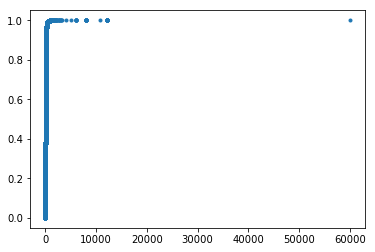

In [106]:
x = np.sort(data5["Donation Amount"].dropna())
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x,y, marker = ".", linestyle = "none")